In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pylab
import calendar
from scipy import stats
#import missingno as msno
from datetime import datetime
import warnings
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline


plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (8,4)
import tkinter
sns.set_style("whitegrid")
sns.set_style("white")
sns.despine(fig=None)
import warnings
warnings.filterwarnings(action='ignore')

<Figure size 576x288 with 0 Axes>

## 1a. Load the hourly bike data

In [2]:
hour_data = pd.read_csv('C:\\Users\\josephMNjerenga1\\Desktop\\Python_class\\hour.csv', index_col=None)
hour = hour_data
print(hour.shape)
hour.head()
hour.dtypes

(17379, 17)


instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [3]:
def dataframe_metainformation(hour):
    meta = dict()
    descr = pd.DataFrame({'dtype': hour.dtypes, 'NAs': hour.isna().sum()})
    categorical_features = descr.loc[descr['dtype'] == 'object'].index.values.tolist()
    numerical_features = descr.loc[descr['dtype'] != 'object'].index.values.tolist()
    numerical_features_na = descr.loc[(descr['dtype'] != 'object') & (descr['NAs'] > 0)].index.values.tolist()
    categorical_features_na = descr.loc[(descr['dtype'] == 'object') & (descr['NAs'] > 0)].index.values.tolist()
    complete_features = descr.loc[descr['NAs'] == 0].index.values.tolist()
    meta['description'] = descr
    meta['categorical_features'] = categorical_features
    meta['categorical_features'] = categorical_features
    meta['categorical_features_na'] = categorical_features_na
    meta['numerical_features'] = numerical_features
    meta['numerical_features_na'] = numerical_features_na
    meta['complete_features'] = complete_features
    return meta

def print_metainformation(meta):
    print('Available types:', meta['description']['dtype'].unique())
    print('{} Features'.format(meta['description'].shape[0]))
    print('{} categorical features'.format(len(meta['categorical_features'])))
    print('{} numerical features'.format(len(meta['numerical_features'])))
    print('{} categorical features with NAs'.format(len(meta['categorical_features_na'])))
    print('{} numerical features with NAs'.format(len(meta['numerical_features_na'])))
    print('{} Complete features'.format(len(meta['complete_features'])))

In [4]:
meta = dataframe_metainformation(hour)
print_metainformation(meta) 

Available types: [dtype('int64') dtype('O') dtype('float64')]
17 Features
1 categorical features
16 numerical features
0 categorical features with NAs
0 numerical features with NAs
17 Complete features


## 1b. Load the day bike data

In [5]:
day_data = pd.read_csv('C:\\Users\\josephMNjerenga1\\Desktop\\Python_class\\day.csv', index_col=None)
day = day_data
print(day.shape)
day.head()
day.dtypes

(731, 16)


instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [6]:
def dataframe_metainformation(day):
    meta = dict()
    descr = pd.DataFrame({'dtype': day.dtypes, 'NAs': day.isna().sum()})
    categorical_features = descr.loc[descr['dtype'] == 'object'].index.values.tolist()
    numerical_features = descr.loc[descr['dtype'] != 'object'].index.values.tolist()
    numerical_features_na = descr.loc[(descr['dtype'] != 'object') & (descr['NAs'] > 0)].index.values.tolist()
    categorical_features_na = descr.loc[(descr['dtype'] == 'object') & (descr['NAs'] > 0)].index.values.tolist()
    complete_features = descr.loc[descr['NAs'] == 0].index.values.tolist()
    meta['description'] = descr
    meta['categorical_features'] = categorical_features
    meta['categorical_features'] = categorical_features
    meta['categorical_features_na'] = categorical_features_na
    meta['numerical_features'] = numerical_features
    meta['numerical_features_na'] = numerical_features_na
    meta['complete_features'] = complete_features
    return meta

def print_metainformation(meta):
    print('Available types:', meta['description']['dtype'].unique())
    print('{} Features'.format(meta['description'].shape[0]))
    print('{} categorical features'.format(len(meta['categorical_features'])))
    print('{} numerical features'.format(len(meta['numerical_features'])))
    print('{} categorical features with NAs'.format(len(meta['categorical_features_na'])))
    print('{} numerical features with NAs'.format(len(meta['numerical_features_na'])))
    print('{} Complete features'.format(len(meta['complete_features'])))

In [7]:
meta = dataframe_metainformation(day)
print_metainformation(meta) 

Available types: [dtype('int64') dtype('O') dtype('float64')]
16 Features
1 categorical features
15 numerical features
0 categorical features with NAs
0 numerical features with NAs
16 Complete features


## Viewing data sets

In [8]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [9]:
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Split label the weekday and months based on the calendar

In [10]:
hour["name_weekday"] = hour.dteday.apply(lambda dateString : calendar.day_name[datetime.strptime(dateString,"%Y-%m-%d").weekday()])
hour["name_month"] = hour.dteday.apply(lambda dateString : calendar.month_name[datetime.strptime(dateString,"%Y-%m-%d").month])

In [11]:
hour.head(1)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,name_weekday,name_month
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,Saturday,January


## Split the date to year, month, and day

In [12]:
from datetime import datetime

# Recreate your dataframe
hour['date'] = hour['dteday']
hour.date = pd.to_datetime(hour.date)

# Create 3 new columns
hour[['year','month','day']] = hour.date.apply(lambda x: pd.Series(x.strftime("%Y,%m,%d").split(",")))

hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,windspeed,casual,registered,cnt,name_weekday,name_month,date,year,month,day
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,0.0,3,13,16,Saturday,January,2011-01-01,2011,01,01
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,0.0,8,32,40,Saturday,January,2011-01-01,2011,01,01
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,0.0,5,27,32,Saturday,January,2011-01-01,2011,01,01
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,0.0,3,10,13,Saturday,January,2011-01-01,2011,01,01
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,0.0,0,1,1,Saturday,January,2011-01-01,2011,01,01


# Exploratory Data Analysis

## 1. Understanding hourly bike use based on month, season, day of the week, type of user

In [13]:
hour['hour'] = hour['hr']
hour.head(1)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,casual,registered,cnt,name_weekday,name_month,date,year,month,day,hour
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,3,13,16,Saturday,January,2011-01-01,2011,01,01,0


[Text(0, 0.5, 'Avearage # of bikers'),
 Text(0.5, 0, 'Hour Of The Day'),
 Text(0.5, 1.0, 'Average Users Count By Hour Of The Day Across User Type'),
 None]

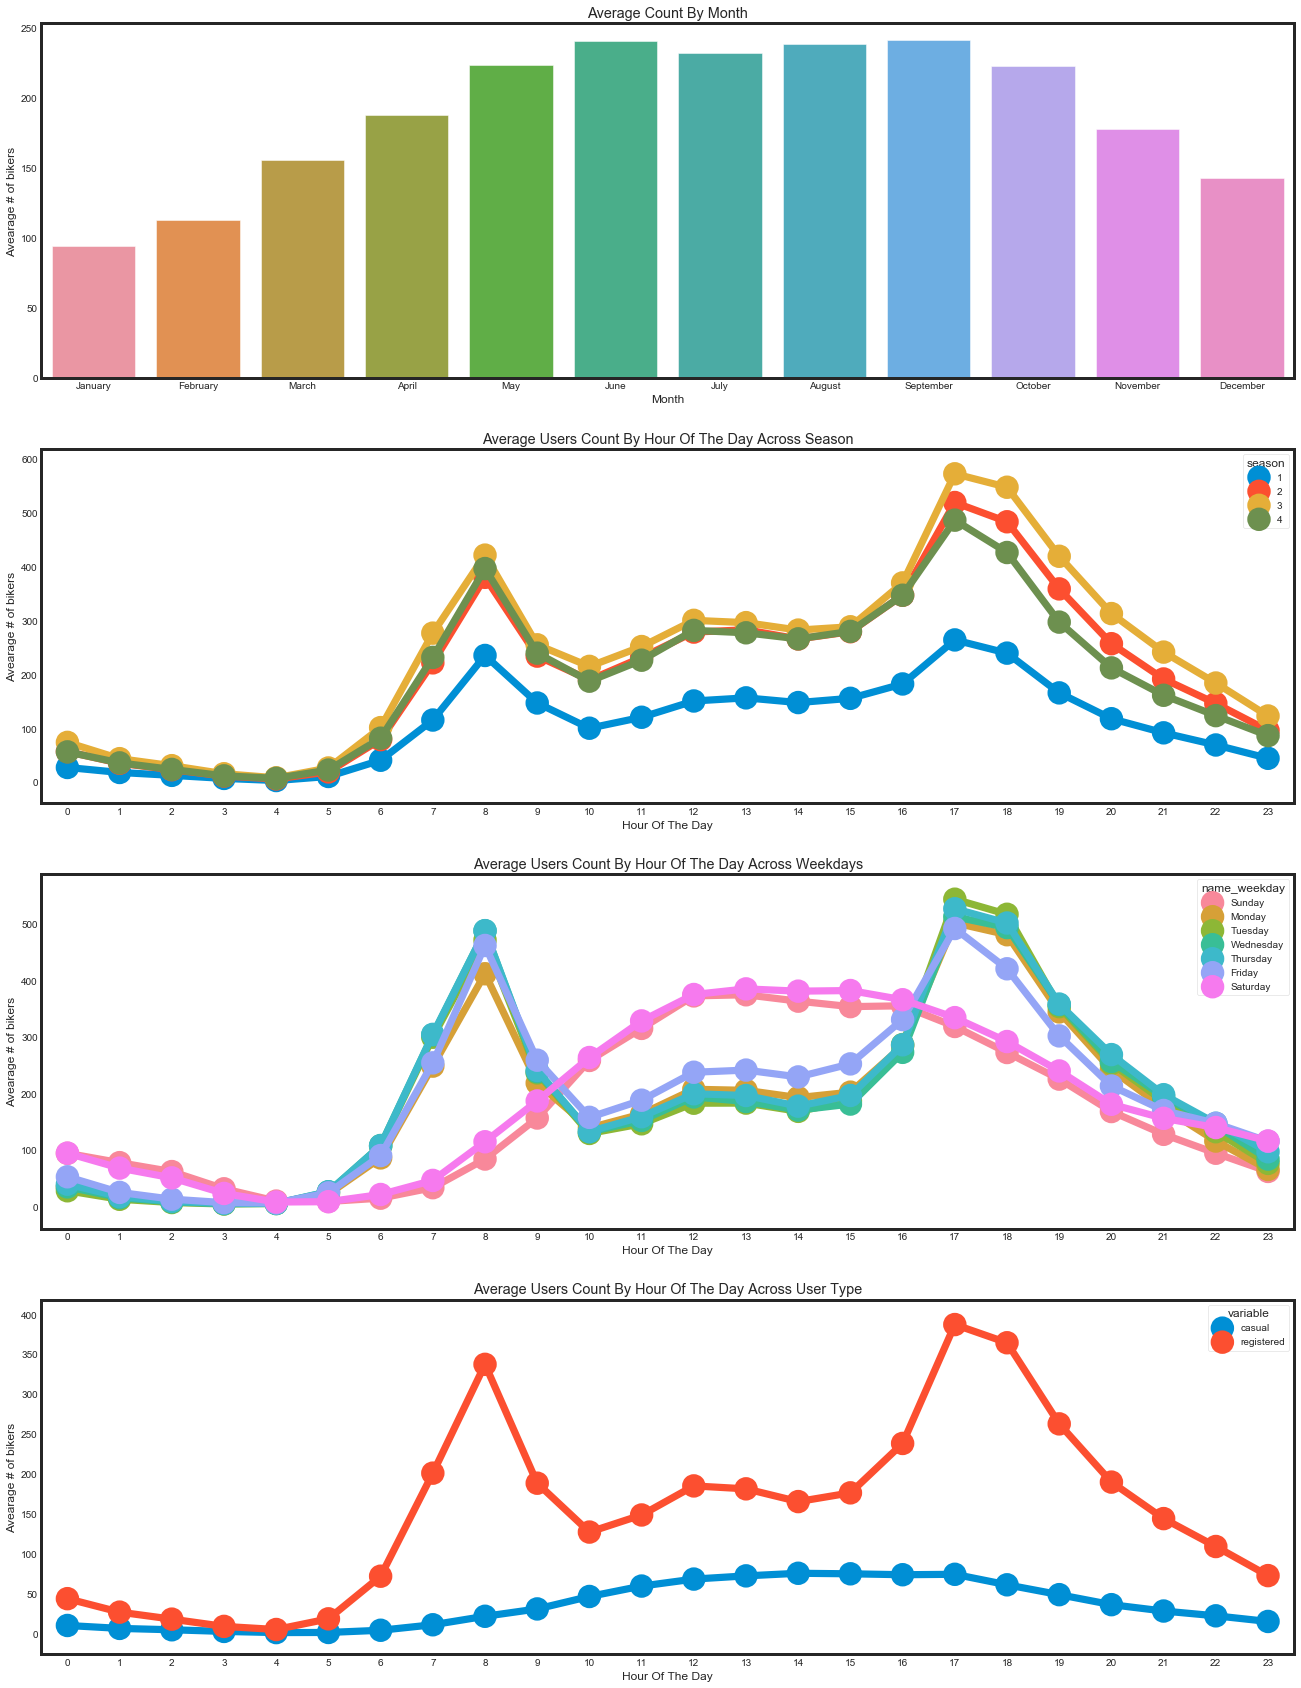

In [14]:
fig,(ax1,ax2,ax3,ax4)= plt.subplots(nrows=4)
fig.set_size_inches(20,30)
sortOrder = ["January","February","March","April","May","June","July","August","September","October","November","December"]
hueOrder = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]

monthAggregated = pd.DataFrame(hour.groupby("name_month")["cnt"].mean()).reset_index()
monthSorted = monthAggregated.sort_values(by="cnt",ascending=False)
sns.barplot(data=monthSorted,x="name_month",y="cnt",ax=ax1,order=sortOrder)
ax1.set(xlabel='Month', ylabel='Avearage # of bikers',title="Average Count By Month")

hourAggregated = pd.DataFrame(hour.groupby(["hour","season"],sort=True)["cnt"].mean()).reset_index()
sns.pointplot(x=hourAggregated["hour"], y=hourAggregated["cnt"], hue=hourAggregated["season"], data=hourAggregated, join=True,ax=ax2)
ax2.set(xlabel='Hour Of The Day', ylabel='Avearage # of bikers',title="Average Users Count By Hour Of The Day Across Season",label='big')

hourAggregated = pd.DataFrame(hour.groupby(["hour","name_weekday"],sort=True)["cnt"].mean()).reset_index()
sns.pointplot(x=hourAggregated["hour"], y=hourAggregated["cnt"],hue=hourAggregated["name_weekday"],hue_order=hueOrder, data=hourAggregated, join=True,ax=ax3)
ax3.set(xlabel='Hour Of The Day', ylabel='Avearage # of bikers',title="Average Users Count By Hour Of The Day Across Weekdays",label='big')

hourTransformed = pd.melt(hour[["hour","casual","registered"]], id_vars=['hour'], value_vars=['casual', 'registered'])
hourAggregated = pd.DataFrame(hourTransformed.groupby(["hour","variable"],sort=True)["value"].mean()).reset_index()
sns.pointplot(x=hourAggregated["hour"], y=hourAggregated["value"],hue=hourAggregated["variable"],hue_order=["casual","registered"], data=hourAggregated, join=True,ax=ax4)
ax4.set(xlabel='Hour Of The Day', ylabel='Avearage # of bikers',title="Average Users Count By Hour Of The Day Across User Type",label='big')

## Box plot to check for outliers

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Working Day'),
 Text(0.5, 1.0, 'Box Plot On Count Across Working Day')]

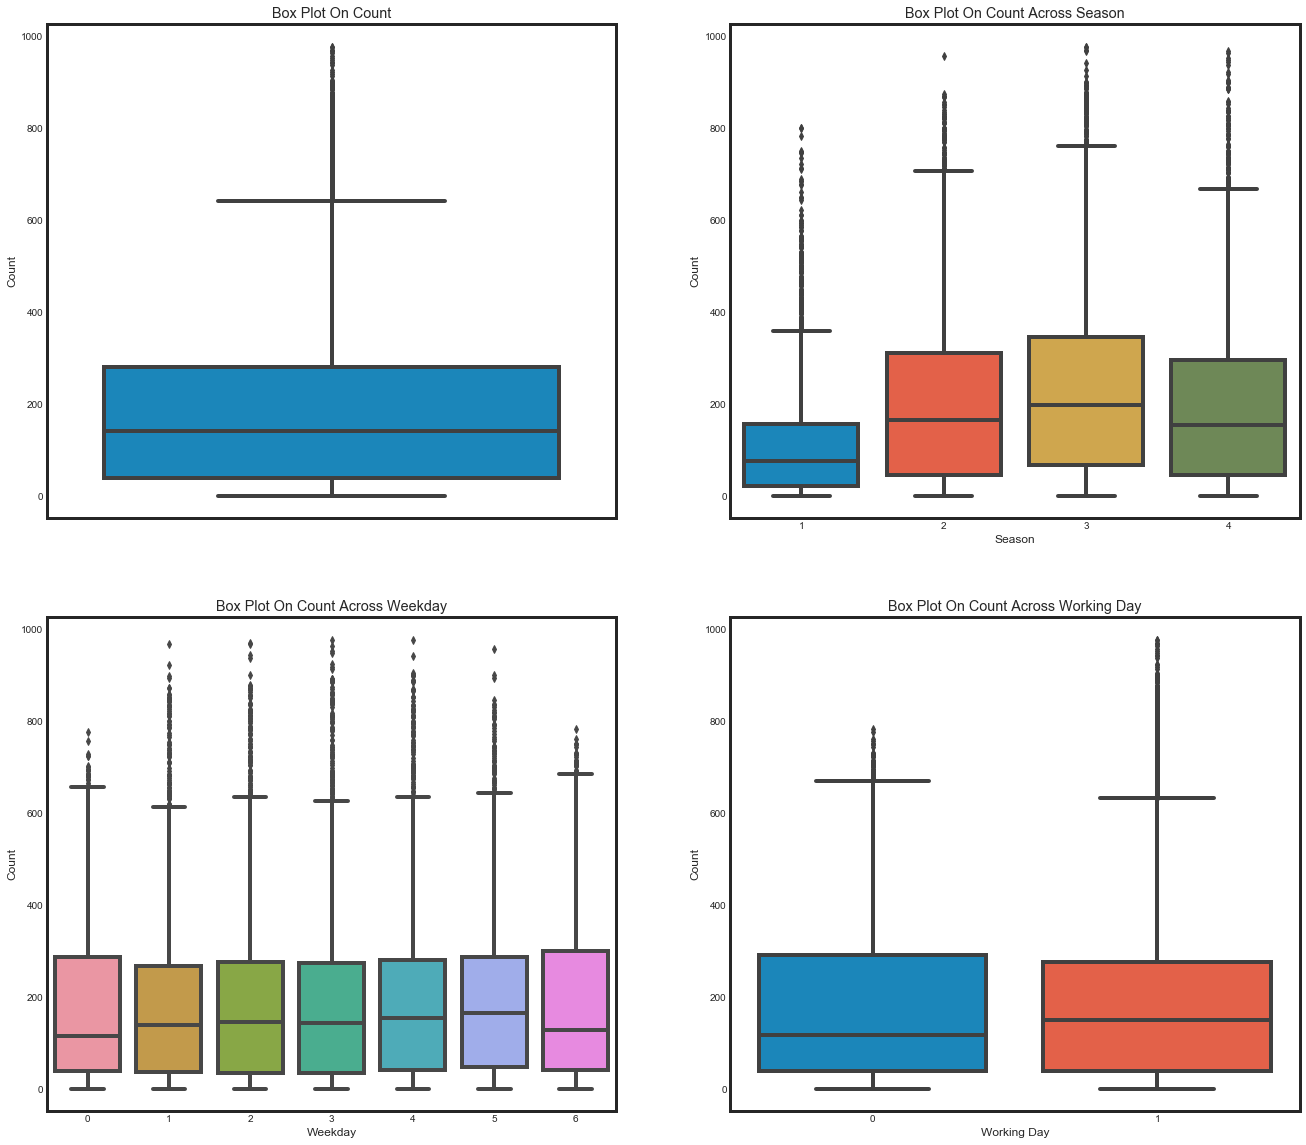

In [15]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(20, 20)
sns.boxplot(data=hour,y="cnt",orient="v",ax=axes[0][0])
sns.boxplot(data=hour,y="cnt",x="season",orient="v",ax=axes[0][1])
sns.boxplot(data=hour,y="cnt",x="weekday",orient="v",ax=axes[1][0])
sns.boxplot(data=hour,y="cnt",x="workingday",orient="v",ax=axes[1][1])

axes[0][0].set(ylabel='Count',title="Box Plot On Count")
axes[0][1].set(xlabel='Season', ylabel='Count',title="Box Plot On Count Across Season")
axes[1][0].set(xlabel='Weekday', ylabel='Count',title="Box Plot On Count Across Weekday")
axes[1][1].set(xlabel='Working Day', ylabel='Count',title="Box Plot On Count Across Working Day")

## b. Correlation matrix 

## b.1. Overall correlation matrix

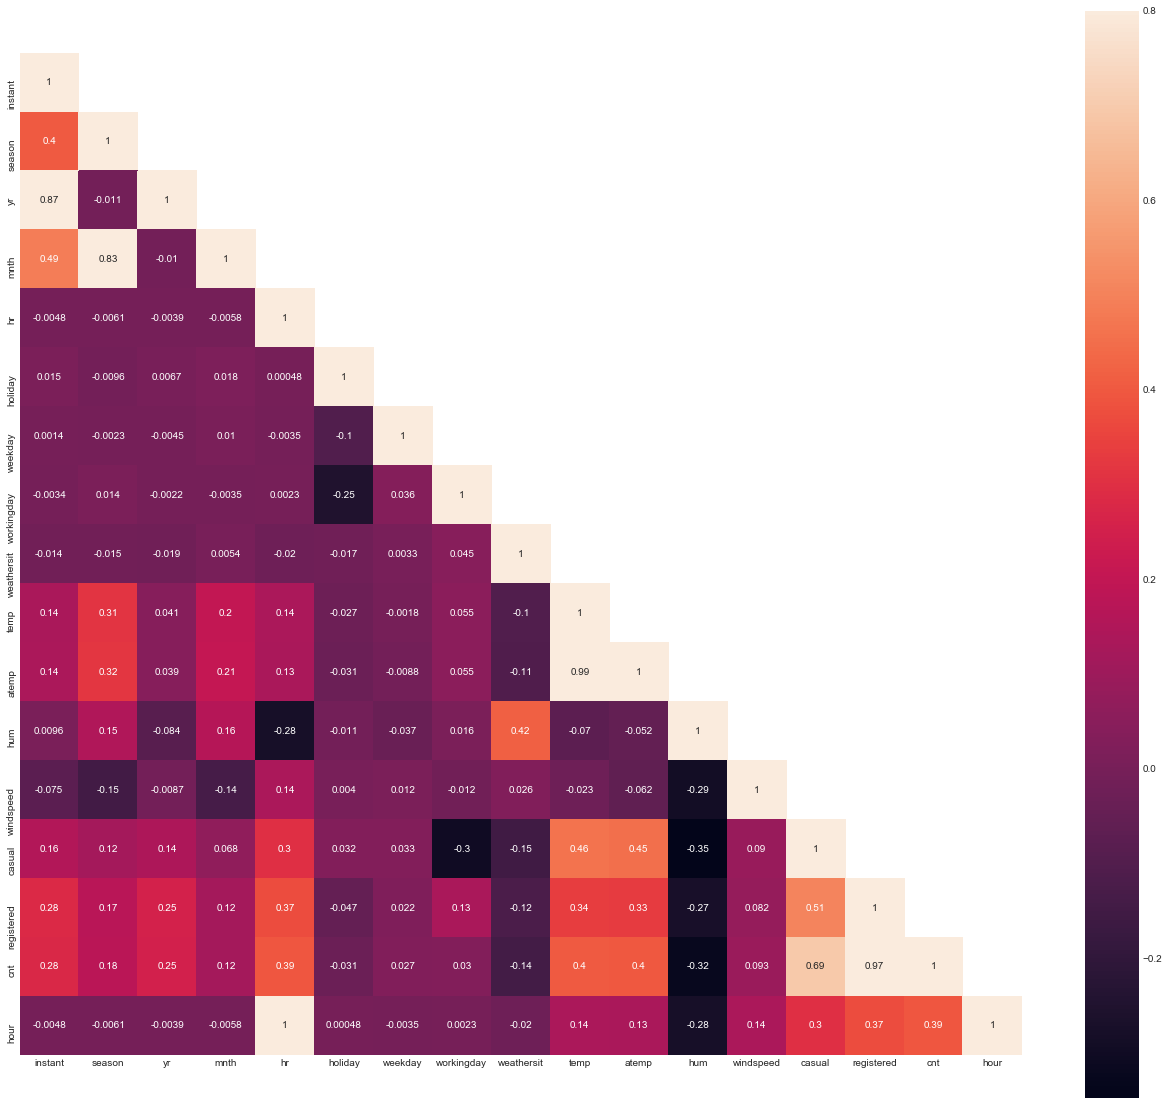

In [16]:
corr = hour.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,20)
sns.heatmap(corr, mask=mask, vmax=.8, square=True, annot=True)

## b.2.Temperature and humidity and windspeed and humidity

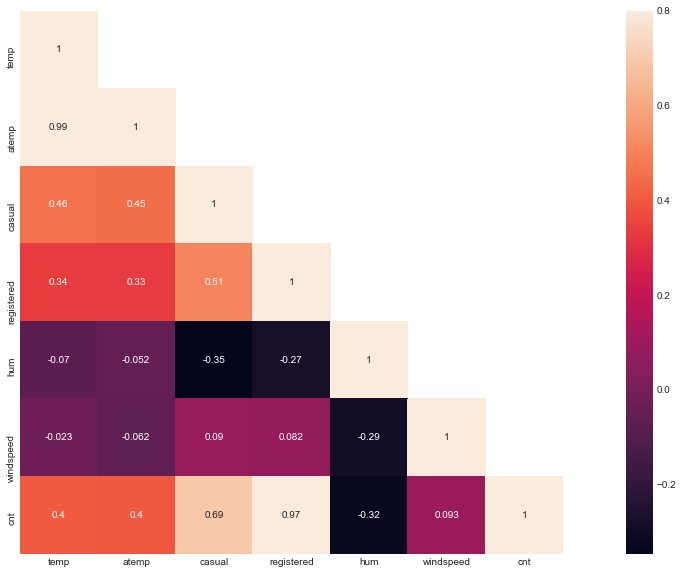

In [17]:
corr = hour[["temp","atemp","casual","registered","hum","windspeed","cnt"]].corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corr, mask=mask,vmax=.8, square=True,annot=True)

## Distribution of wind, atemp, humidity

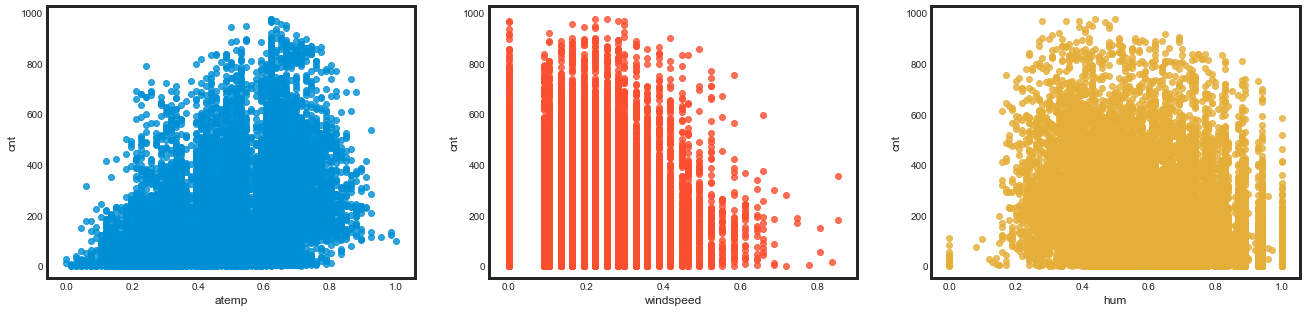

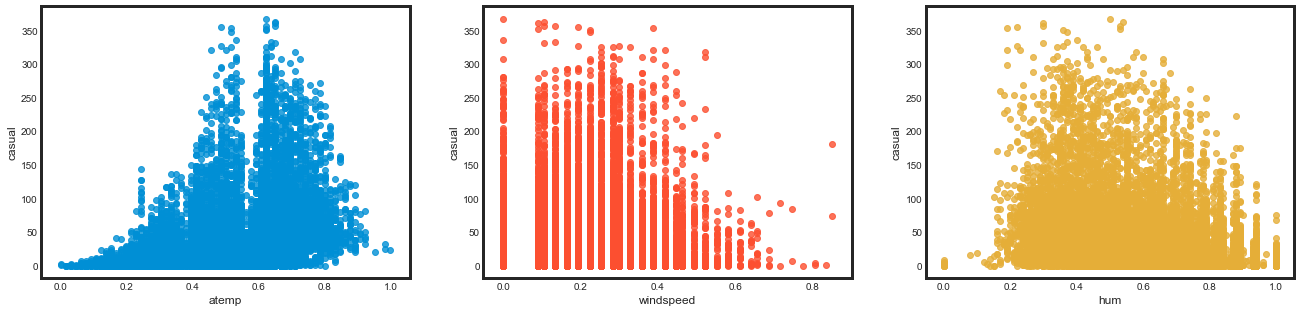

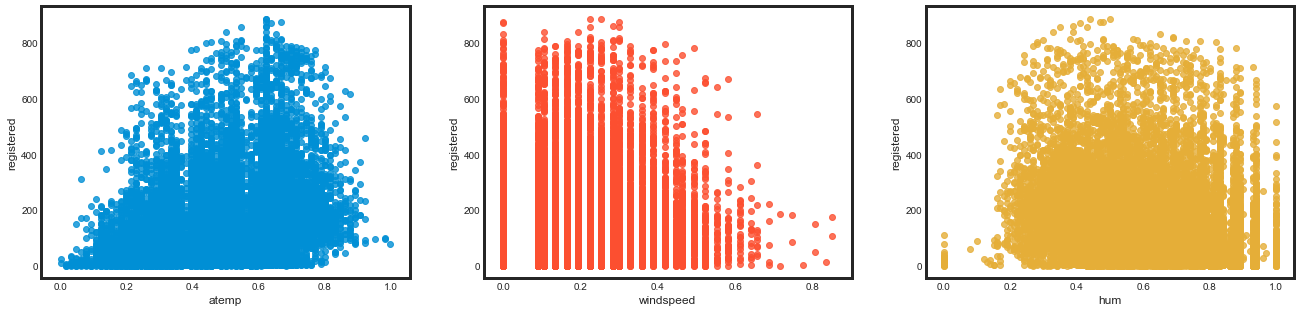

In [18]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3)
fig.set_size_inches(20, 5)
sns.regplot(x="atemp", y="cnt", data=hour, ax=ax1, fit_reg = False)
sns.regplot(x="windspeed", y="cnt", data=hour, ax=ax2, fit_reg = False)
sns.regplot(x="hum", y="cnt", data=hour, ax=ax3, fit_reg = False)

fig,(ax1,ax2,ax3) = plt.subplots(ncols=3)
fig.set_size_inches(20, 5)
sns.regplot(x="atemp", y="casual", data=hour, ax=ax1, fit_reg = False)
sns.regplot(x="windspeed", y="casual", data=hour, ax=ax2, fit_reg = False)
sns.regplot(x="hum", y="casual", data=hour, ax=ax3, fit_reg = False)

fig,(ax1,ax2,ax3) = plt.subplots(ncols=3)
fig.set_size_inches(20, 5)
sns.regplot(x="atemp", y="registered", data=hour, ax=ax1, fit_reg = False)
sns.regplot(x="windspeed", y="registered", data=hour, ax=ax2, fit_reg = False)
sns.regplot(x="hum", y="registered", data=hour, ax=ax3, fit_reg = False)

## Distribution of bikers

In [19]:
hour_no_outliers = hour[np.abs(hour["cnt"]-hour["cnt"].mean())<=(3*hour["cnt"].std())]

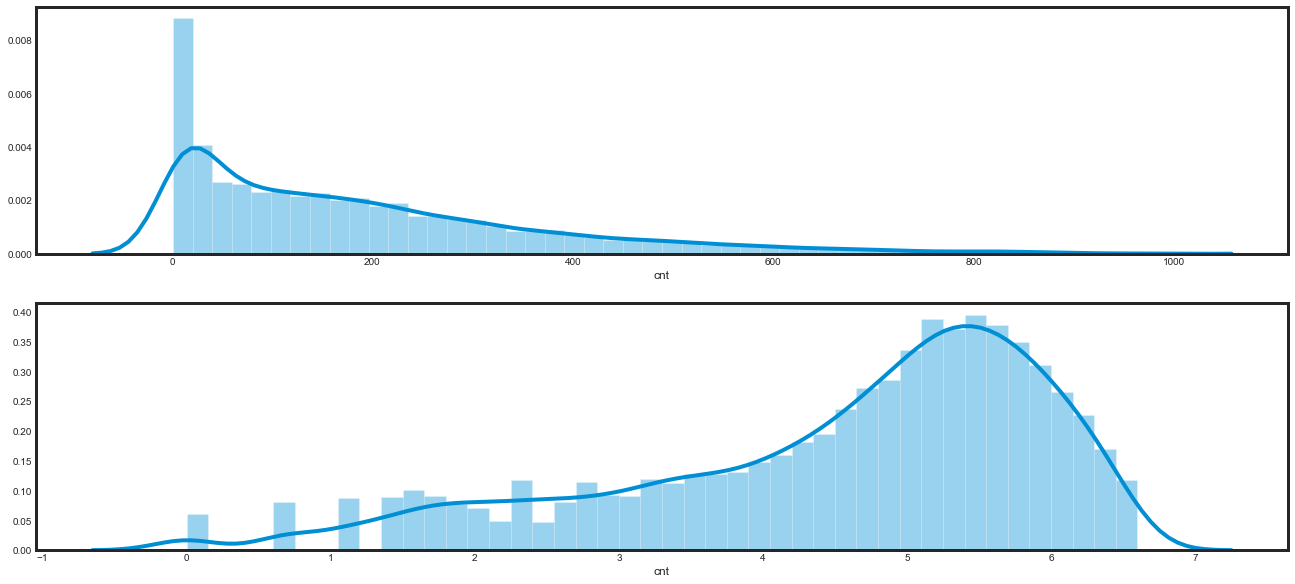

In [20]:
fig,axes = plt.subplots(ncols=1,nrows=2)
fig.set_size_inches(20, 10)
sns.distplot(hour["cnt"],ax=axes[0])
sns.distplot(np.log(hour_no_outliers["cnt"]),ax=axes[1])
